In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [62]:
data1 = np.load('x.npy')
data2 = np.load('y.npy')

In [63]:
x = pd.DataFrame(data1)
y = pd.DataFrame(data2)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

4000 4000


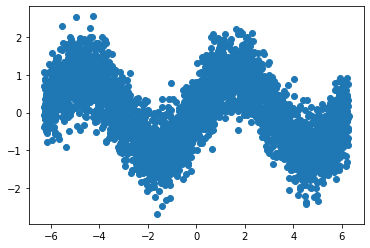

In [66]:
plt.scatter(X_train, y_train)
print(len(X_train), len(y_train))

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot

In [89]:
# define the dataset
x = asarray(X_train)
y = asarray(y_train)

In [88]:
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [70]:
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

In [94]:
# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

In [95]:
#loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')

In [96]:
# fit the model on the training dataset
model.fit(x, y, epochs=100, batch_size=10, verbose=0)

In [97]:
# make predictions for the input data
yhat = model.predict(x)

In [98]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

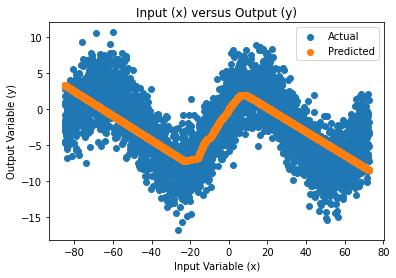

In [99]:
# plot x vs yhat
pyplot.scatter(x_plot,y_plot, label='Actual')
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()